<a href="https://colab.research.google.com/github/serevg34/PhD_Repo/blob/master/method_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Код к домашнему заданию.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Это генерация данных, здесь ничего менять не надо.

In [ ]:
# Инициализируем генератор случайных чисел. Более подробно о генераторе см. Python 3.10.4 documentation.
np.random.seed(1234)

Ссылка на документацию модуля random https://docs.python.org/3/library/random.html

In [ ]:
# Возьмем 1 признак и 1000 объектов
n_features = 1
n_objects = 1000

# параметр, отвечающий за зашумленность данных
noise = 5.2

# пределы изменения X 
scaleX = 7
# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-scaleX, scaleX, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, noise, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

# Смотрим на результат:
# print('X:', X, '\n', X.shape)
# print('Y: ', Y,'\n', Y.shape)
print('w_true: ',w_true)
print('w: ', w)

w_true:  [0.47143516]
w:  [0.]


In [ ]:
X_true = np.array([[-scaleX],[scaleX]])
Y_true =  X_true.dot(w_true)

In [ ]:
print(X_true)
print(Y_true)

[[-7]
 [ 7]]
[-3.30004615  3.30004615]


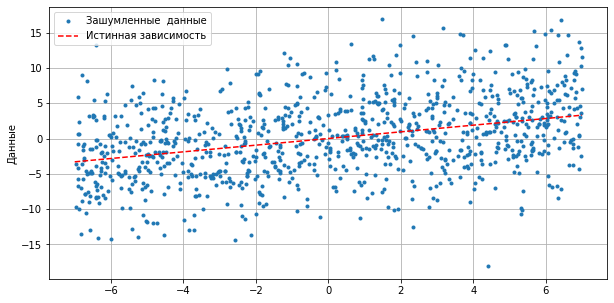

In [ ]:

plt.figure(figsize = (10,5))
plt.plot(X, Y,'.', label = 'Зашумленные  данные')
plt.plot(X_true, Y_true,'r--', label = 'Истинная зависимость')
plt.grid(True)
plt.legend()
plt.ylabel('Данные')
plt.show()

In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [ ]:
# Реализуем функцию, вычисляющую матрицу решения метода наименьших квадратов
def fit_LSM(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [ ]:
# Реализуем функцию, возвращающую матрицу решения
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

[0.50221587]
В случае использования нормального уравнения функционал ошибки составляет 26.8976


## 3. Градиентный спуск

Собственно, домашнее задание касалось только этой части занятия. Конкретно, надо изменить приведенную ниже функцию так, чтобы параметр градиентного спуска _eta_ зависил от изменения за один шаг расстояния между параметрами регрессии до шага градиентного спуска, и после. Смысл такой зависимости в том, чтобы вначале делать большие шаги, но по мере приближения к целевому значению уменьшать шаг градиентного спуска, чтобы не "перескочить" минимум.

In [ ]:
# # список векторов весов после каждой итерации
# w[:] = 0
# w_list = [[0]+ w.copy().tolist()]

# # список значений ошибок после каждой итерации
# errors = []

# # шаг градиентного спуска
# eta = 0.001

# # максимальное число итераций
# max_iter = 1e3

# # критерий сходимости (разница весов, при которой алгоритм останавливается)
# min_weight_dist = 1e-8

# # зададим начальную разницу весов большим числом
# weight_dist = np.inf

# # счетчик итераций
# iter_num = 0

# # ход градиентного спуска
# while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
#     # новый вес w
#     new_w = w - 2 * eta/(iter_num*0.01+1) * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
#     # оценка рассояния по эвклиду между старым и новым состоянием w
#     weight_dist = np.linalg.norm(new_w - w, ord=2)
    
#     w_list.append([iter_num]+new_w.copy().tolist())
#     errors.append(mserror(X, new_w, Y))

#     iter_num += 1
#     w = new_w
    
# w_list = np.array(w_list)

# print(X.shape, w.shape)

Для этого реализуем функцию, использующую параметры iter_num так, чтобы она была ограничена при iter_num -> 0, но стремилась к нулю при приближении к бесконечности переменной iter_num. Я выбрал, например, такую
$$y = \frac{1}{\alpha n +1}$$
где коэффициент $\alpha$ подобран эмпирически.

In [ ]:
def transform_lerning_rate(iter_num):
    return 1 /(iter_num*0.01+1)

In [ ]:
# список векторов весов после каждой итерации
w[:] = 0
w_list = [[0]+ w.copy().tolist()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.001

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = 10

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta *transform_lerning_rate(iter_num)* np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, Y))
    
    transform_lerning_rate(iter_num)

    iter_num += 1
    w = new_w
    print(weight_dist)
    
w_list = np.array(w_list)

print(X.shape, w.shape)

0.017128748479143713
0.0163807420267862
0.015672413904187887
0.015001294564980616
0.014365090433045291
0.013761669807069332
0.013189050016491302
0.012645385707078557
0.012128958147246904
0.011638165457630911
0.011171513676526412
0.010727608582809356
0.010305148205921488
0.009902915959624503
0.009519774342558462
0.00915465915429392
0.008806574180613314
0.008474586306270182
0.008157821017511085
0.007855458260262654
0.007566728623127711
0.00729090981724434
0.007027323427675702
0.006775331913348948
0.006534335834674665
0.006303771289885851
0.006083107542850297
0.00587184482666081
0.0056695123087067145
0.005475666204194873
0.005289888026232037
0.005111782961615519
0.004940978362418302
0.004777122344304885
0.004619882483284821
0.0044689446033138736
0.004324011647788173
0.0041848026285561946
0.004051051646600579
0.0039225069790226885
0.0037989302273981895
0.0036800955229740473
0.0035657887845380043
0.0034558070251272666
0.003349957704044282
0.0032480581209279324
0.0031499348488803203
0.003055

2.805065586697353e-06
2.7876890144051814e-06
2.7704443050780014e-06
2.7533302746629573e-06
2.7363457516527134e-06
2.719489576530343e-06
2.702760601658305e-06
2.686157691389468e-06
2.6696797217340418e-06
2.6533255801375333e-06
2.6370941658138136e-06
2.6209843888569395e-06
2.604995170907287e-06
2.5891254444854184e-06
2.5733741528810583e-06
2.55774025037514e-06
2.5422227017957155e-06
2.5268204826289775e-06
2.5115325785751708e-06
2.496357985992681e-06
2.4812957108988343e-06
2.4663447698580754e-06
2.4515041890937894e-06
2.4367730047103464e-06
2.422150262582079e-06
2.407635018131238e-06
2.393226336439014e-06
2.378923291690427e-06
2.3647249675073923e-06
2.350630456837699e-06
2.33663886151092e-06
2.3227492923494353e-06
2.308960868946386e-06
2.295272719998742e-06
2.281683982530147e-06
2.2681938023350057e-06
2.2548013335343953e-06
2.2415057386870885e-06
2.2283061887895528e-06
2.2152018628318615e-06
2.2021919477976937e-06
2.1892756392194457e-06
2.1764521398459635e-06
2.163720660752766e-06
2.15108

In [ ]:
new_w


array([0.50208436])

In [ ]:
w_array= np.array(w_list[:])
w_array.shape

(1001, 2)

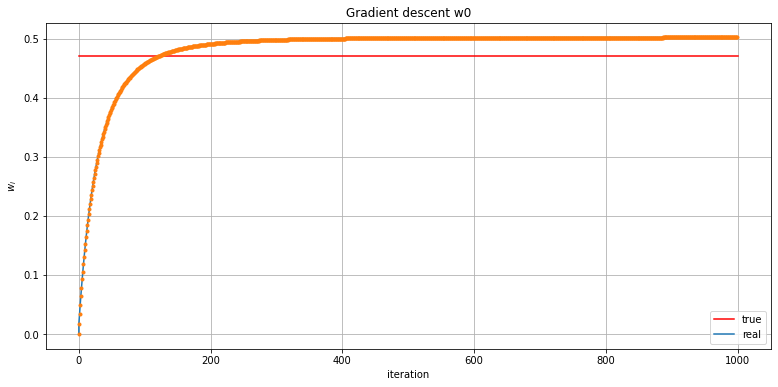

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)

for i in range(len(w_true)):
    plt.figure(figsize=(13, 6))
    plt.title('Gradient descent w'+str(i))
    plt.xlabel('iteration')
    plt.ylabel(r'$w_i$')
    
    plt.plot([0, len(w_list)], [w_true[i], w_true[i]], c='r', label = 'true')
    plt.plot(w_array[:, 0], w_array[:, i+1], label = 'real')
    plt.plot(w_array[:, 0], w_array[:, i+1],'.')
    plt.grid(True)
    plt.legend()
    plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


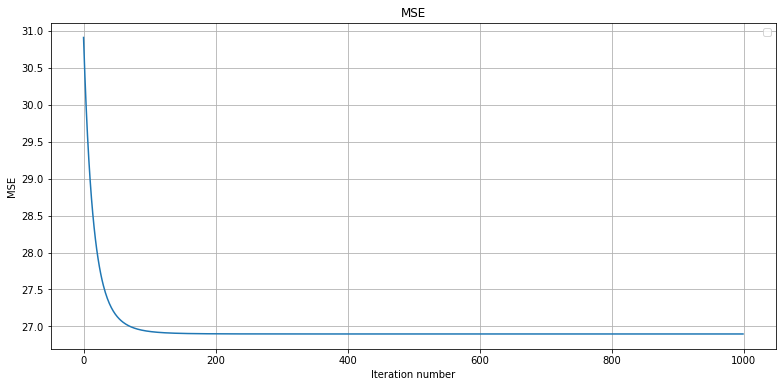

In [ ]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

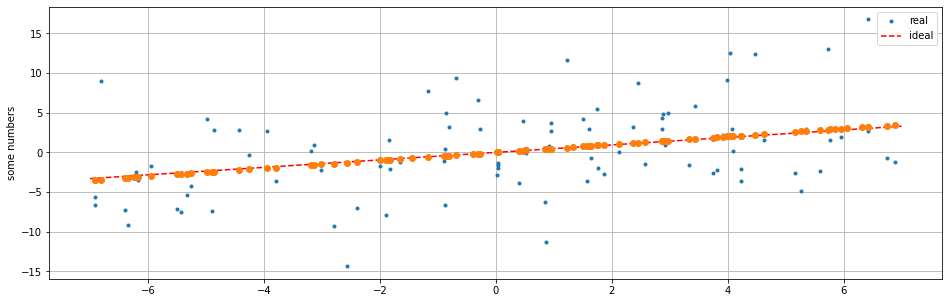

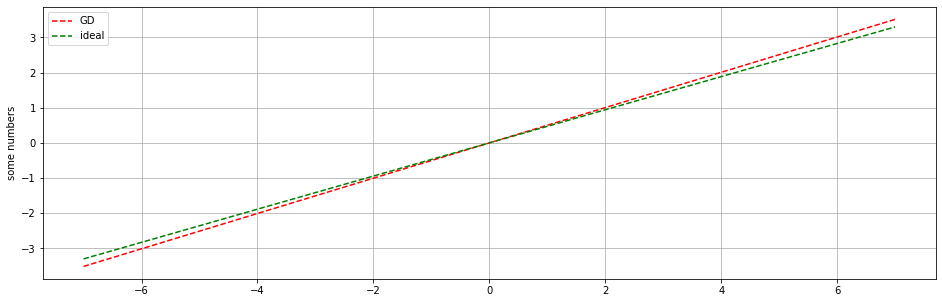

In [ ]:
N = 100
plt.figure(figsize = (16,5))
plt.plot(X[:N,:], Y[:N],'.', label = 'real')
plt.plot(X_true, Y_true,'r--', label = 'ideal')

plt.plot(X[:N,:],np.dot(X[:N,:],new_w),'o')
plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (16,5))

#plt.plot(X_true, Y_true,'r--', label = 'ideal')
plt.plot(X_true,np.dot(X_true,new_w),'r--', label = 'GD')
plt.plot(X_true,Y_true,'g--', label = 'ideal')

plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()